In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"c:\Users\goex1\Desktop\DS Projekte für GITHUB\Zara_sales_EDA.csv",sep=";")

df.head(5)


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [5]:
df[['Sales Volume', 'price']].describe()



,Sales Volume,price
count,20252.000000,20252.000000
mean,1097.400454,41.949061
std,298.234609,23.380960
min,518.000000,12.000000
25%,849.000000,23.950000
50%,990.000000,35.950000
75%,1364.250000,53.950000
max,1940.000000,134.990000


c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot - Sales Volume')

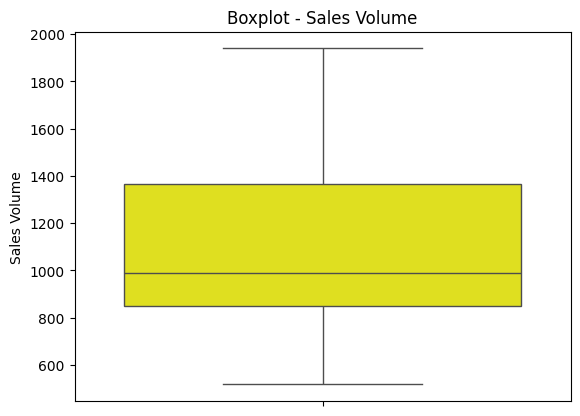

In [6]:
sns.boxplot(df,y='Sales Volume',color='yellow')
plt.title("Boxplot - Sales Volume")


c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot- Price')

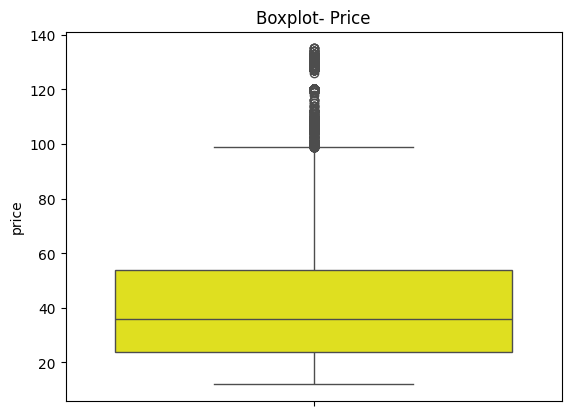

In [7]:
sns.boxplot(df,y='price',color='yellow')
plt.title("Boxplot- Price")

<Axes: xlabel='Promotion', ylabel='count'>

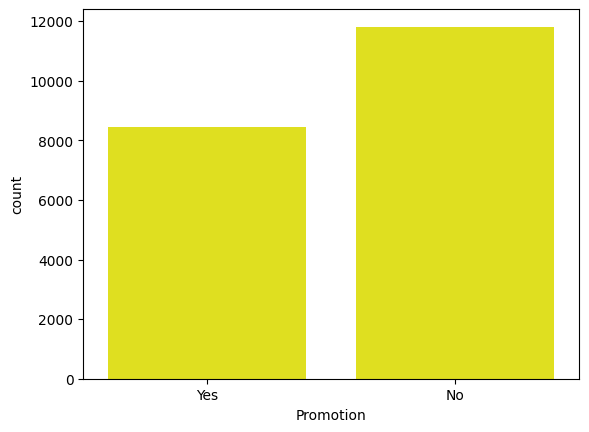

In [8]:
sns.countplot(data=df, x='Promotion', color="yellow")

<Axes: xlabel='Seasonal', ylabel='count'>

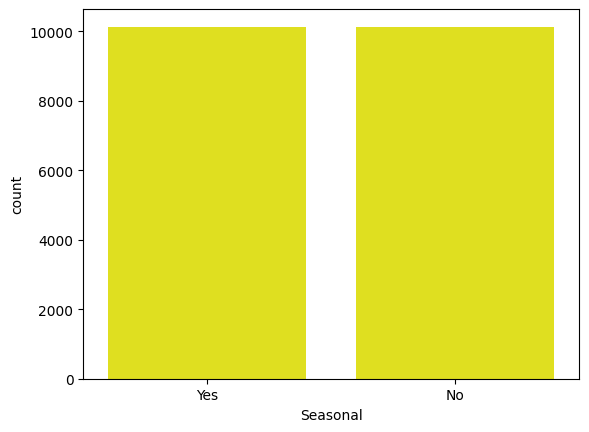

In [9]:
sns.countplot(data=df, x='Seasonal', color="yellow")

In [10]:
#4. Missing data?
print("Wie viele Null-Werte sind vorhanden?")
print(df.isnull().sum())


Wie viele Null-Werte sind vorhanden?
Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

target='Sales Volume'
features=['price','Promotion','Seasonal']


# Copy features
X = df[features].copy()
y = df[target]


X = pd.get_dummies(X, drop_first=True, dtype=float)

# Splitting the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
#Linear Regression
from sklearn.linear_model import LinearRegression

clf=LinearRegression()

# Fit the model on the training data
clf.fit(X_train, y_train)




LinearRegression()

In [13]:

# Predict
y_pred = clf.predict(X_test)



In [14]:

#Regression equation:
clf.intercept_
clf.coef_

print("Regression equation:")

print(f"y = {clf.intercept_} + {clf.coef_[0]}*x1+ {clf.coef_[1]}*x2 + {clf.coef_[2]}*x3")

print("---------------------------------------------------------------------------")



Regression equation:
y = 994.7228931946966 + -2.772863488807522*x1+ 522.4371851533829*x2 + 1.3446944516932717*x3
---------------------------------------------------------------------------


In [15]:
print("Sales Volume=")

print(f"y = {clf.intercept_} + {clf.coef_[0]}*price+ {clf.coef_[1]}*Promotion + {clf.coef_[2]}*Seasonal")

Sales Volume=
y = 994.7228931946966 + -2.772863488807522*price+ 522.4371851533829*Promotion + 1.3446944516932717*Seasonal


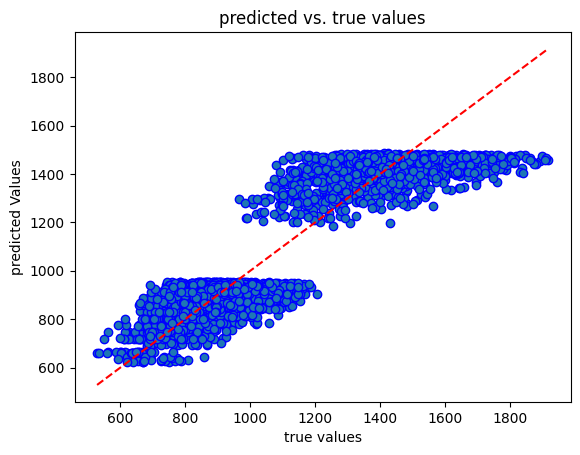

In [16]:
plt.scatter(y_test, y_pred,edgecolors='blue')
plt.xlabel("true values")
plt.ylabel("predicted Values")
plt.title("predicted vs. true values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')


In [17]:
#evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Evaluate---------------------")
print("mae =", mae)
print("mse =",mse)
print("r2 =", r2)

Evaluate---------------------
mae = 91.6562393841497
mse = 13864.614700471866
r2 = 0.8422033822034523
